In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/arib168/data/main/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<ipython-input-3-718c63a92f6c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Profit'])


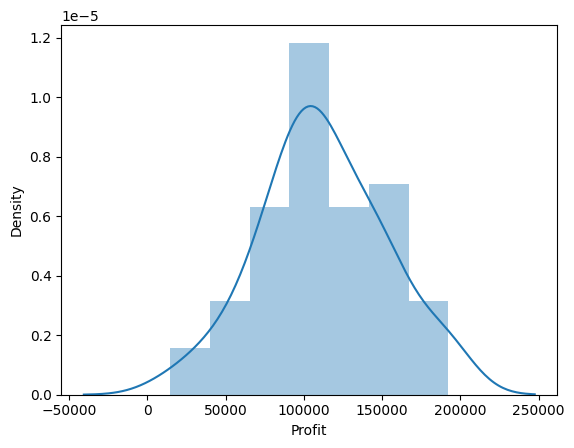

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['Profit'])
plt.show()

In [4]:
df['Profit'].max()

192261.83

In [5]:
df['Profit'].min()

14681.4

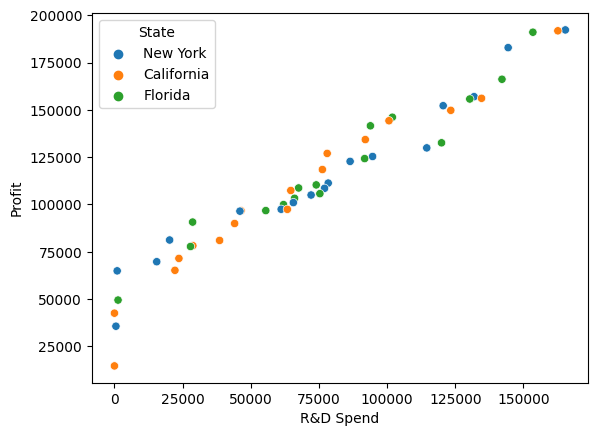

In [6]:
sns.scatterplot(x = 'R&D Spend',y='Profit',data=df,hue='State')
plt.show()

In [7]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
pr_num = df.select_dtypes(include=['int64','float64'])
pr_num.head()
pr_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [9]:
x = pr_num.iloc[:,0:3].values
y = pr_num.iloc[:,-1].values

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train) # Trains the model.

LinearRegression()

In [12]:
y_pred = model.predict(x_test)

In [13]:
# Visualization using Pandas:-
df1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1.head()

,Actual,Predicted
0,103282.38,104858.687926
1,144259.40,132180.423764
2,146121.95,133322.119334
3,77798.83,72113.629337
4,191050.39,179083.555620


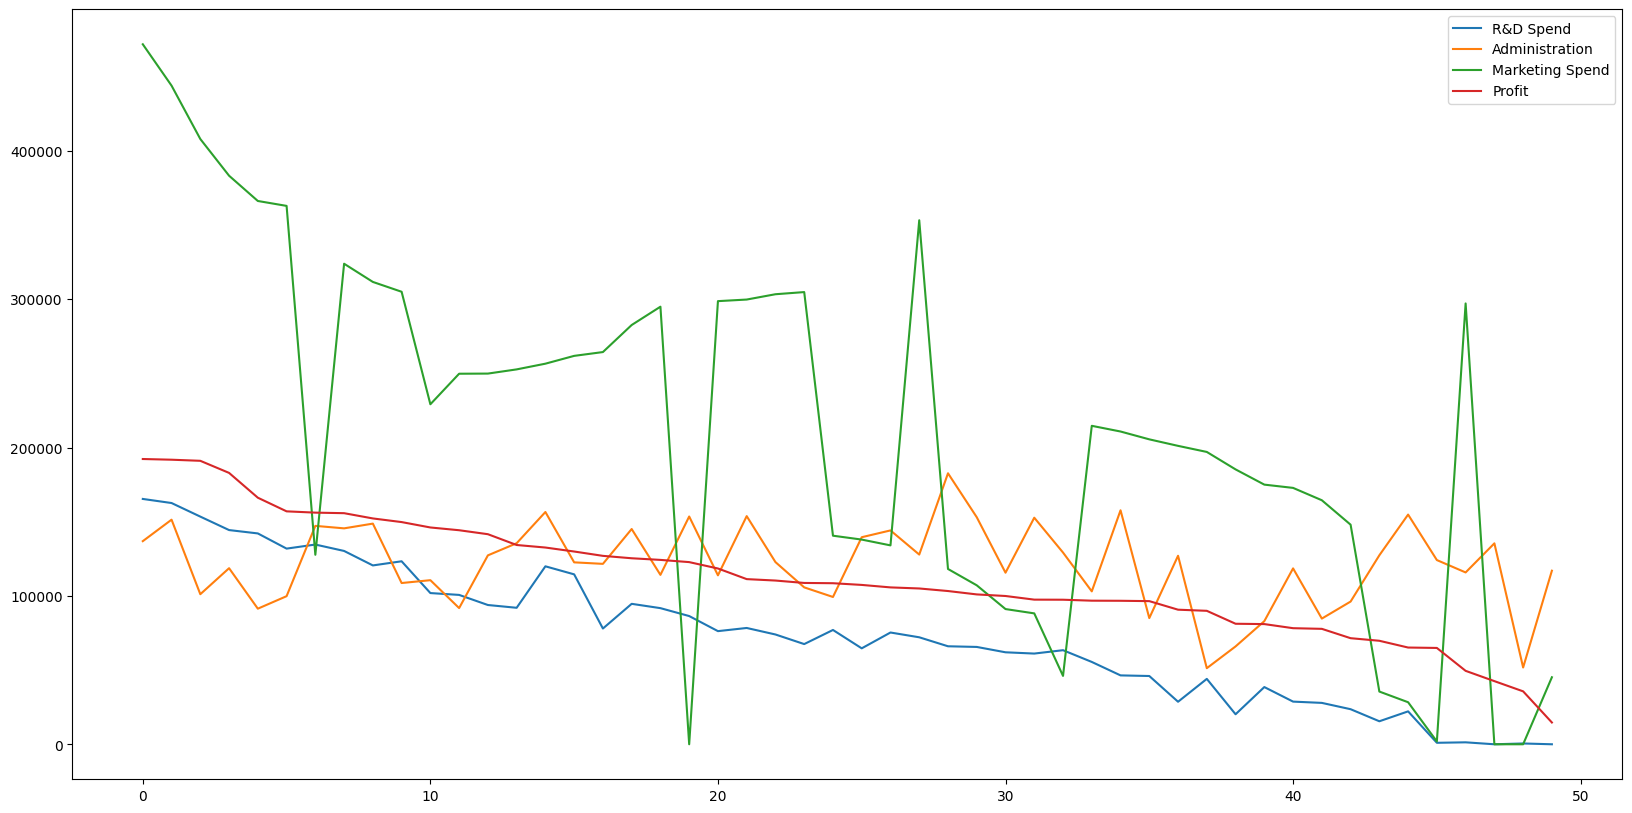

In [14]:
import matplotlib.pyplot as plt
df.plot(figsize=[20,10])
plt.show()

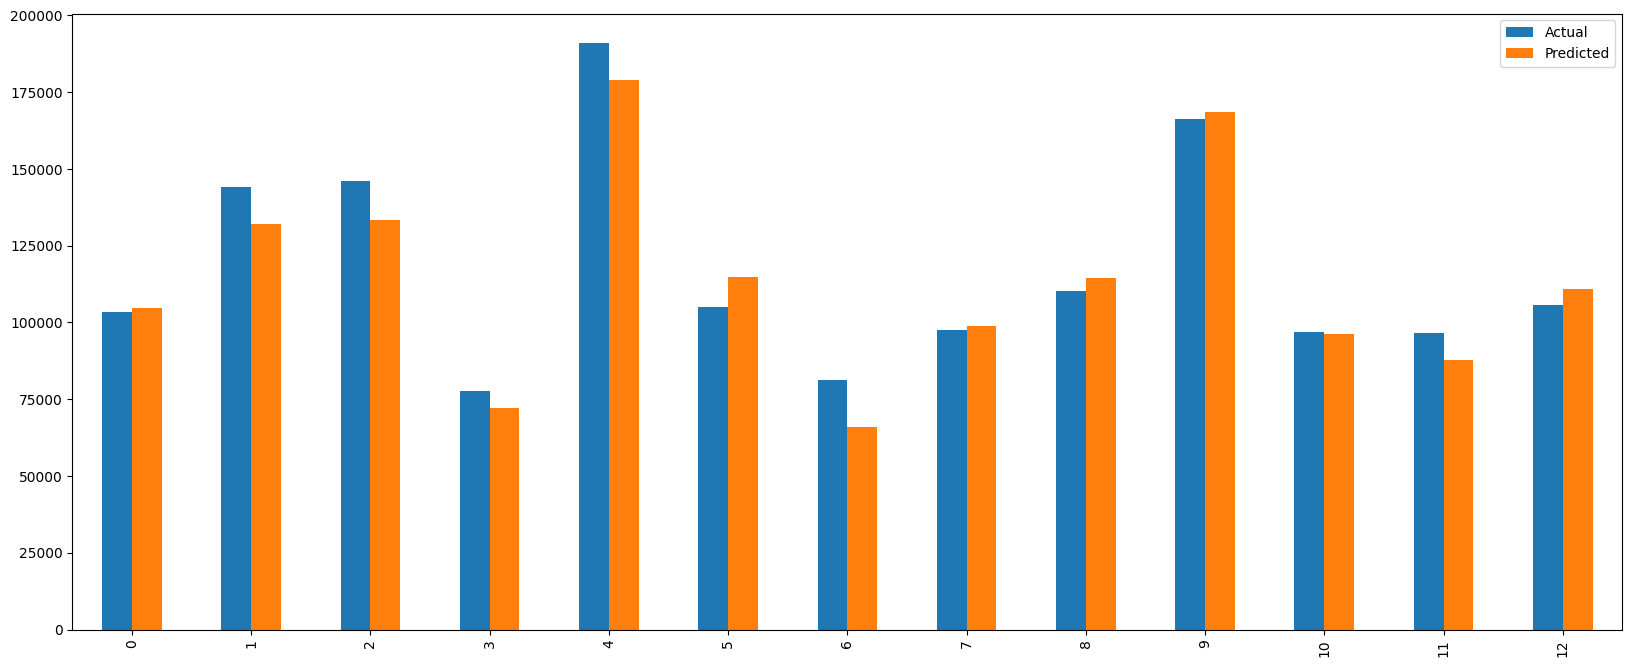

In [15]:
df1.plot(kind='bar',figsize=[20,8])
plt.show()

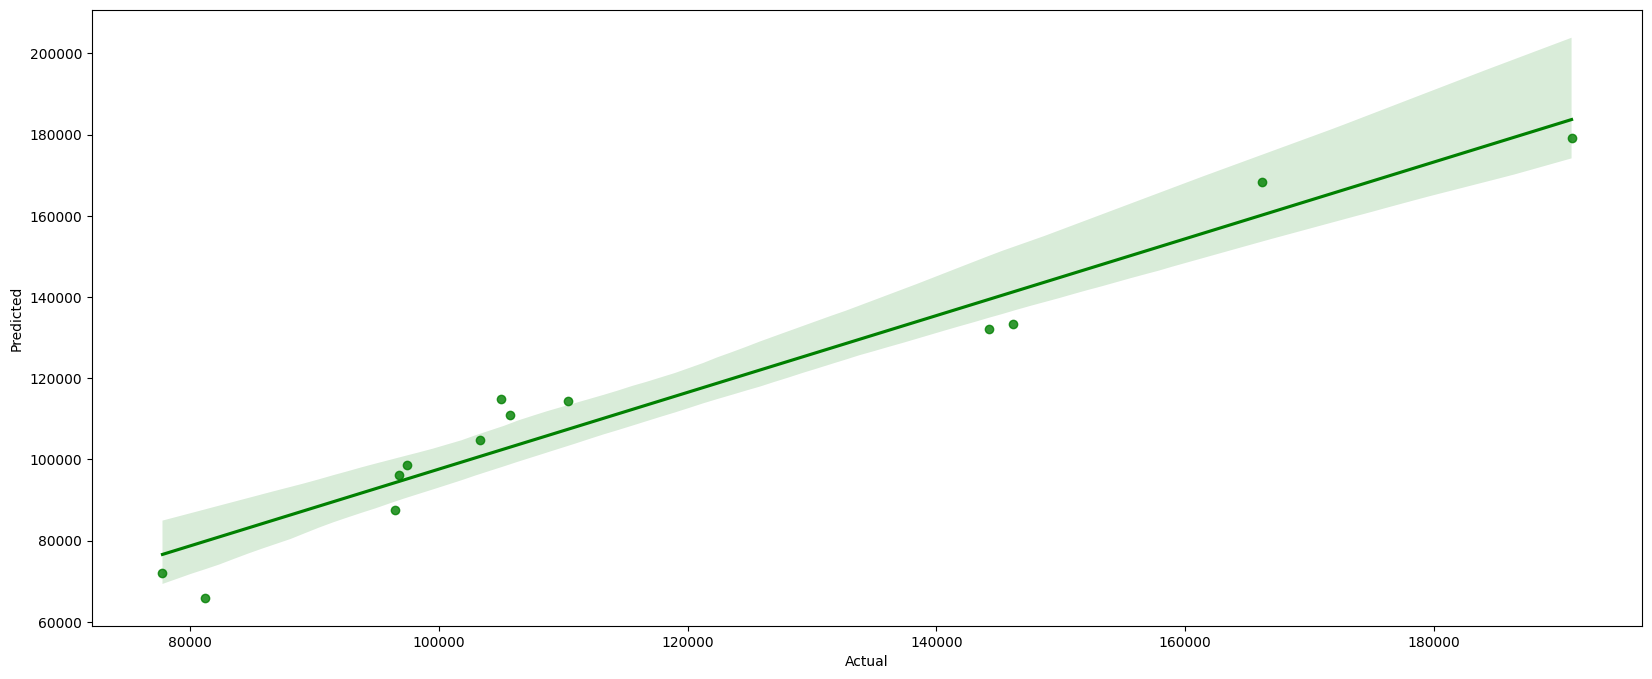

In [16]:
# Data Visualization using Seaborn:-
import seaborn as sns
plt.figure(figsize=[20,8])
sns.regplot(x='Actual',y='Predicted',data=df1,color='green')
plt.show()

In [17]:
# R2 Score:-
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred) * 100)

93.25475204846336